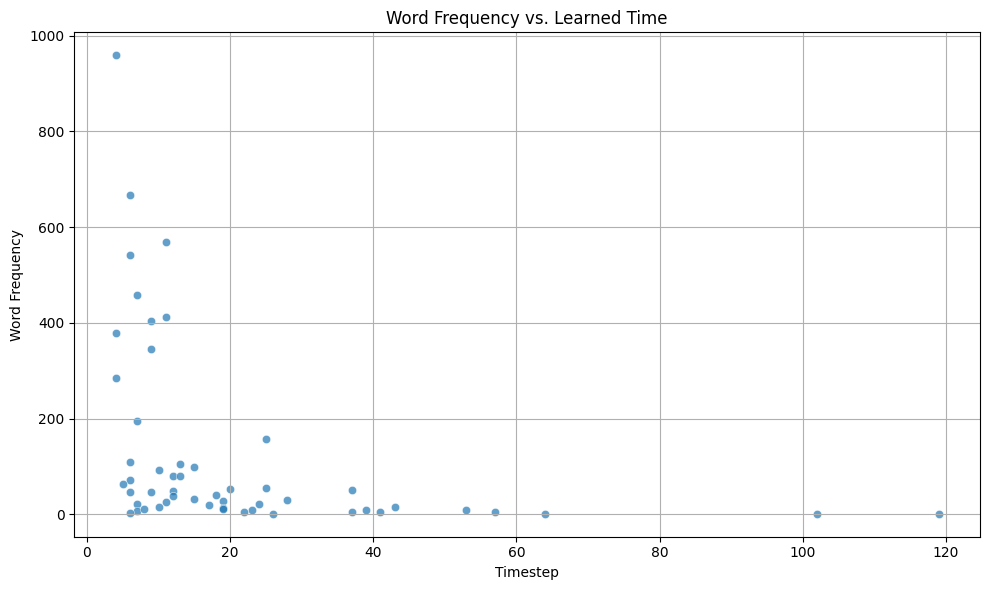

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "input_wn_fu_cs_scaled_categ.dev.words1000"

columns = [
    "word_pos", "frequency", "first_seen_time", "learned_flag",
    "learned_time", "learned_freq", "learned_vocab_rank", "last_seen_time"
]

df_raw = pd.read_csv(file_path, names=columns)

df_raw["learned_time"] = pd.to_numeric(df_raw["learned_time"], errors="coerce")
df_raw["frequency"] = pd.to_numeric(df_raw["frequency"], errors="coerce")
filtered = df_raw[(df_raw["learned_time"] > 0) & (df_raw["frequency"] > 0)].copy()

filtered["word"] = filtered["word_pos"].astype(str).apply(lambda x: x.split(":")[0] if ":" in x else x)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered, x="learned_time", y="frequency", alpha=0.7)
plt.title("Word Frequency vs. Learned Time")
plt.xlabel("Timestep")
plt.ylabel("Word Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


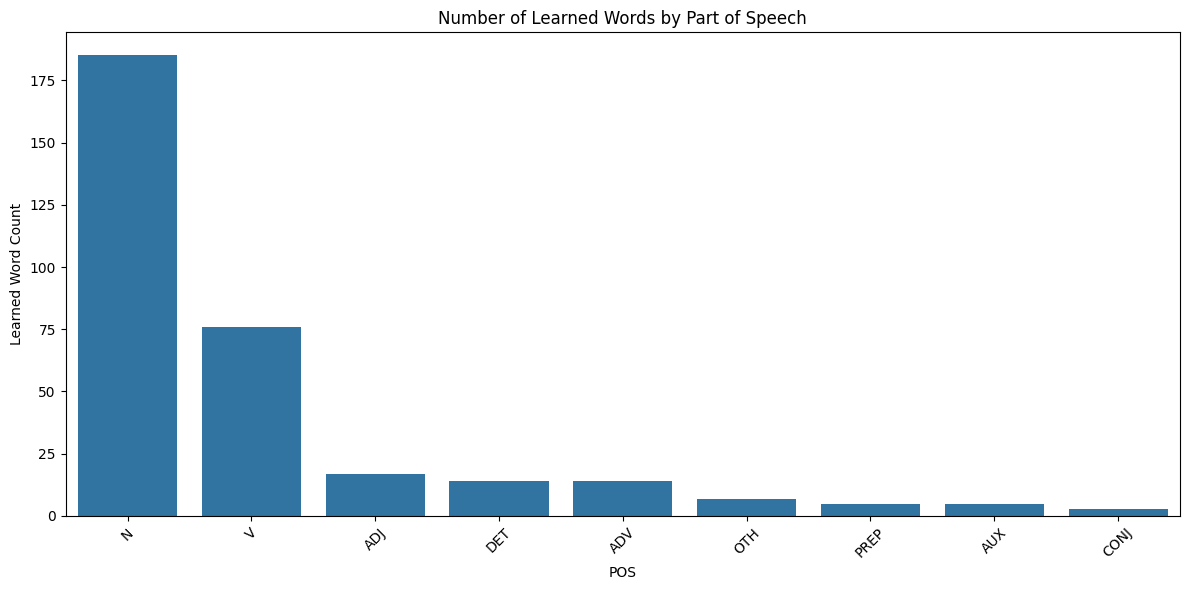

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

with open("input_wn_fu_cs_scaled_categ.dev.words1000", "r") as f:
    lines = f.readlines()

data = []
for line in lines:
    parts = line.strip().split(",")
    if len(parts) < 8:
        continue
    word_pos, frequency, first_seen_time, learned_flag, learned_time, learned_freq, learned_vocab_rank, last_seen_time = parts[:8]
    word, pos = word_pos.rsplit(":", 1)
    data.append({
        "word": word,
        "POS": pos,
        "frequency": int(frequency),
        "first_seen_time": int(first_seen_time),
        "learned_flag": int(learned_flag),
        "learned_time": int(learned_time),
        "learned_freq": int(learned_freq),
        "learned_vocab_rank": int(learned_vocab_rank),
        "last_seen_time": int(last_seen_time),
    })

df = pd.DataFrame(data)

learned_df = df[df["learned_flag"] > 0]

pos_counts = learned_df["POS"].value_counts().reset_index()
pos_counts.columns = ["POS", "Learned Word Count"]

plt.figure(figsize=(12, 6))
sns.barplot(data=pos_counts, x="POS", y="Learned Word Count")
plt.title("Number of Learned Words by Part of Speech")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


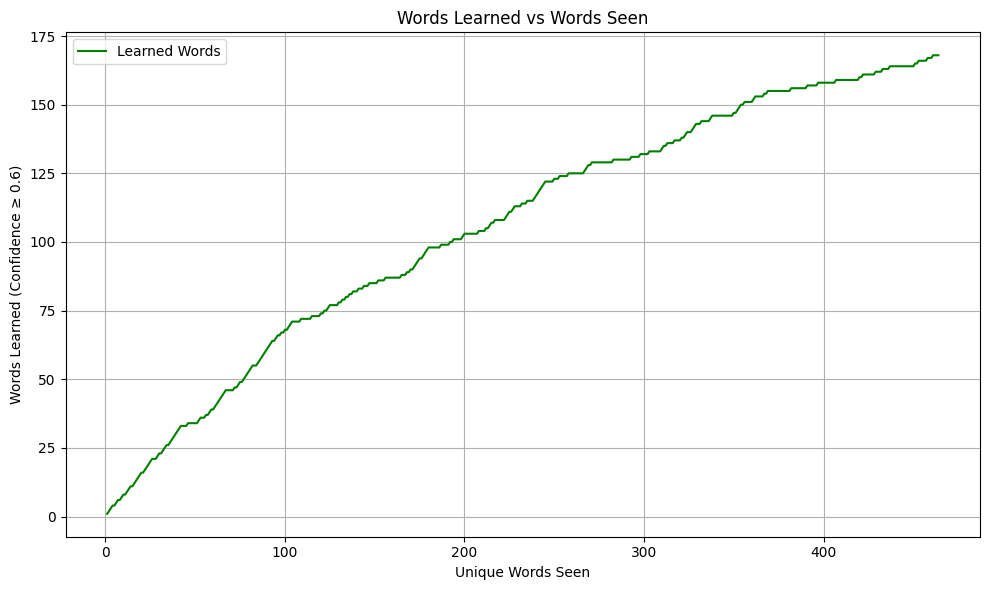

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import re

with open('lex_lm_-1.0_a20.0_ep0.01', 'r') as f:
    lines = f.readlines()

words = []
confidences = []

i = 0
while i < len(lines):
    line = lines[i].strip()
    if '<<' in line and '>>' in line:
        match = re.search(r'<<\s*([0-9.]+)\s*>>', line)
        if match:
            conf = float(match.group(1))
            confidences.append(conf)
        i += 1
    elif line:
        word = line.split(':')[0]
        words.append(word)
        i += 1
    else:
        i += 1

df = pd.DataFrame({'word': words[:len(confidences)], 'confidence': confidences})
df['seen_idx'] = df.index + 1
df['learned'] = df['confidence'] >= 0.6
df['cumulative_learned'] = df['learned'].cumsum()

plt.figure(figsize=(10, 6))
plt.plot(df['seen_idx'], df['cumulative_learned'], label='Learned Words', color='green')
plt.xlabel('Unique Words Seen')
plt.ylabel('Words Learned (Confidence ≥ 0.6)')
plt.title('Words Learned vs Words Seen')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



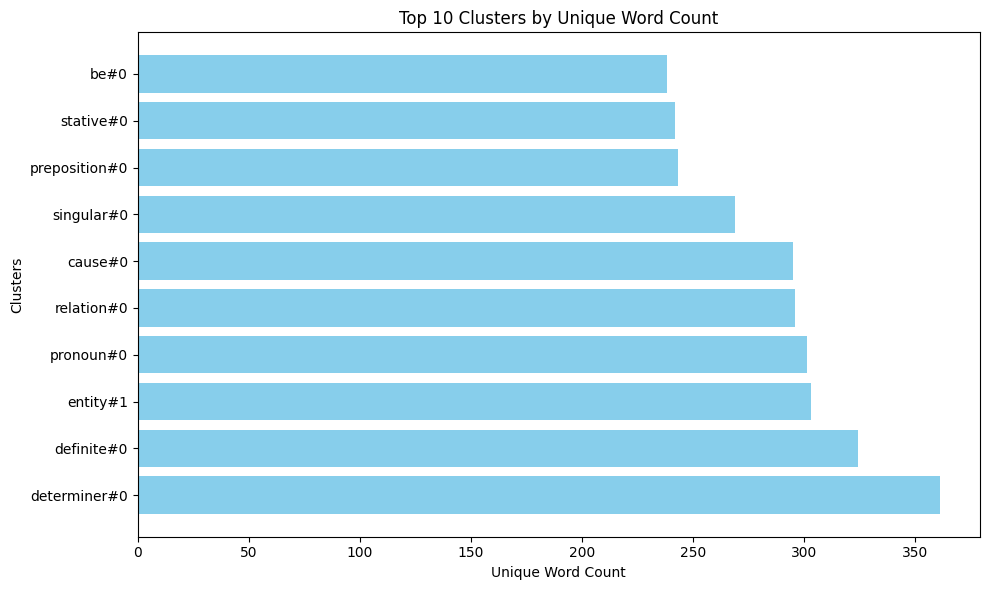

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import defaultdict

file_path = "aligns_lm_-1.0_a20.0_ep0.01"

clusters = defaultdict(set)

with open(file_path, 'r') as file:
    data = file.readlines()

cluster_regex = r"([a-zA-Z]+#\d+)"
word_score_regex = r"\(\d+, \d+\.\d+\)"

for line in data:
    cluster_match = re.search(cluster_regex, line)
    if cluster_match:
        cluster_name = cluster_match.group(1)

        words = re.findall(r"([a-zA-Z]+)", line.split("[")[0])

        clusters[cluster_name].update(words)

cluster_word_counts = {cluster: len(words) for cluster, words in clusters.items()}

top_clusters = sorted(cluster_word_counts.items(), key=lambda x: x[1], reverse=True)[:10]

top_cluster_names = [cluster for cluster, _ in top_clusters]
top_word_counts = [count for _, count in top_clusters]

plt.figure(figsize=(10, 6))
plt.barh(top_cluster_names, top_word_counts, color='skyblue')
plt.xlabel('Unique Word Count')
plt.ylabel('Clusters')
plt.title('Top 10 Clusters by Unique Word Count')
plt.tight_layout()
plt.show()


In [48]:
import re

file_path = 'aligns_lm_-1.0_a20.0_ep0.01'
with open(file_path, 'r') as file:
    data = file.readlines()

stative_regex = r"stative#\d+\s*\[(.*?)\]"

stative_words = []

for line in data:
    if "stative" in line.lower():
        words = re.findall(r"([a-zA-Z]+)", line.split("[")[0])
        stative_words.extend(words)

print("Stative Cluster Words:", stative_words[:20])


Stative Cluster Words: ['be', 'V', 'stative', 'not', 'NEG', 'stative', 'you', 'N', 'stative', 'that', 'N', 'stative', 'watch', 'V', 'stative', 'joel', 'N', 'stative', 'the', 'DET']


CDS

<Figure size 1000x600 with 0 Axes>

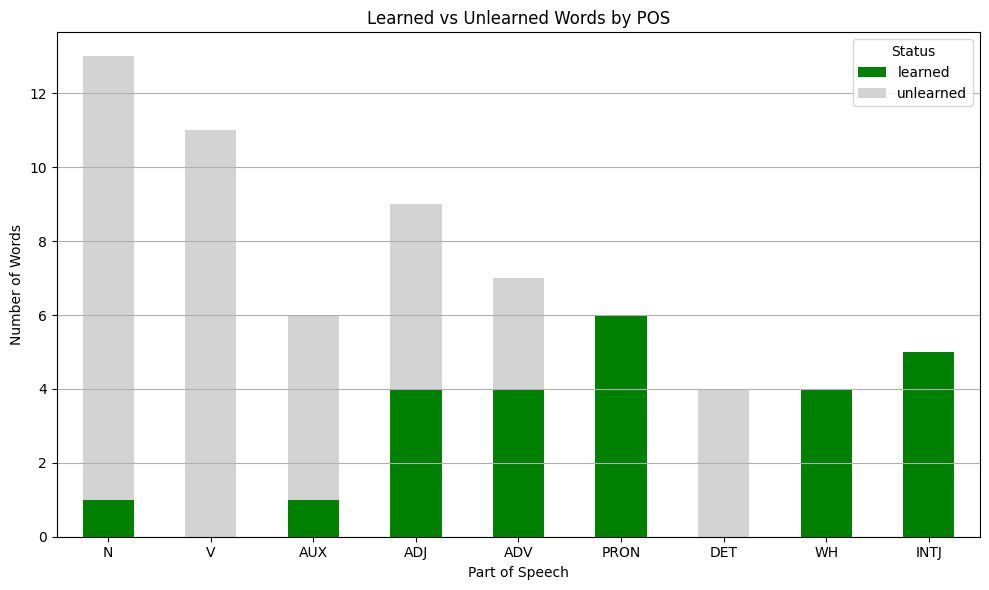

In [59]:
import matplotlib.pyplot as plt

pos_data = {
    "N": {"learned": 1, "total": 13},
    "V": {"learned": 0, "total": 11},
    "AUX": {"learned": 1, "total": 6},
    "ADJ": {"learned": 4, "total": 9},
    "ADV": {"learned": 4, "total": 7},
    "PRON": {"learned": 6, "total": 6},
    "DET": {"learned": 0, "total": 4},
    "WH": {"learned": 4, "total": 4},
    "INTJ": {"learned": 5, "total": 5},
}

pos_df = pd.DataFrame(pos_data).T
pos_df["unlearned"] = pos_df["total"] - pos_df["learned"]

plt.figure(figsize=(10, 6))
pos_df[["learned", "unlearned"]].plot(
    kind="bar", stacked=True, figsize=(10, 6), color=["green", "lightgray"]
)

plt.title("Learned vs Unlearned Words by POS")
plt.xlabel("Part of Speech")
plt.ylabel("Number of Words")
plt.xticks(rotation=0)
plt.legend(title="Status")
plt.grid(axis="y")
plt.tight_layout()
plt.show()


Max heard value: 464
Last 5 heard values: 995    464
996    464
997    464
998    464
999    464
Name: heard, dtype: int64


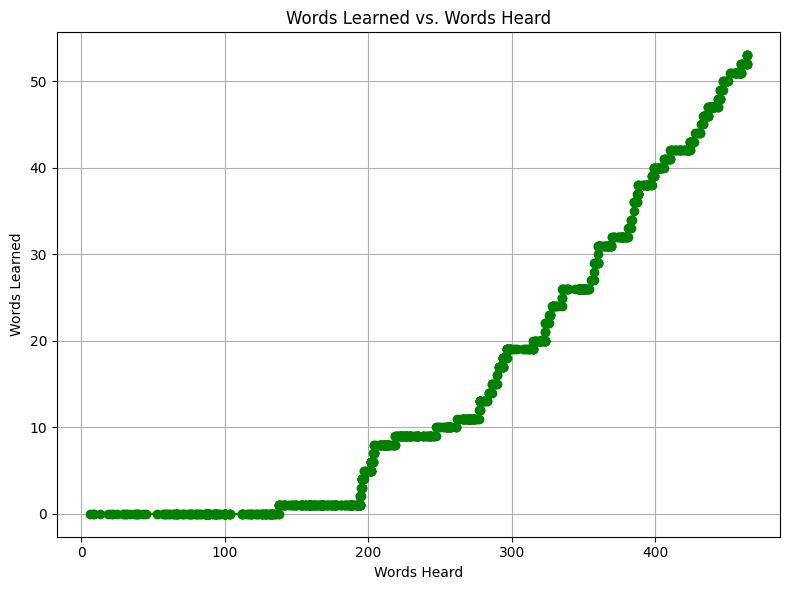

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("time_props_1000.csv")
df.columns = df.columns.str.strip()

print("Max heard value:", time_props_df["heard"].max())
print("Last 5 heard values:", time_props_df["heard"].tail())


plt.figure(figsize=(8, 6))
plt.plot(time_props_df["heard"], time_props_df["learned"], marker='o', color='green')

plt.title("Words Learned vs. Words Heard")
plt.xlabel("Words Heard")
plt.ylabel("Words Learned")
plt.grid(True)
plt.tight_layout()
plt.show()


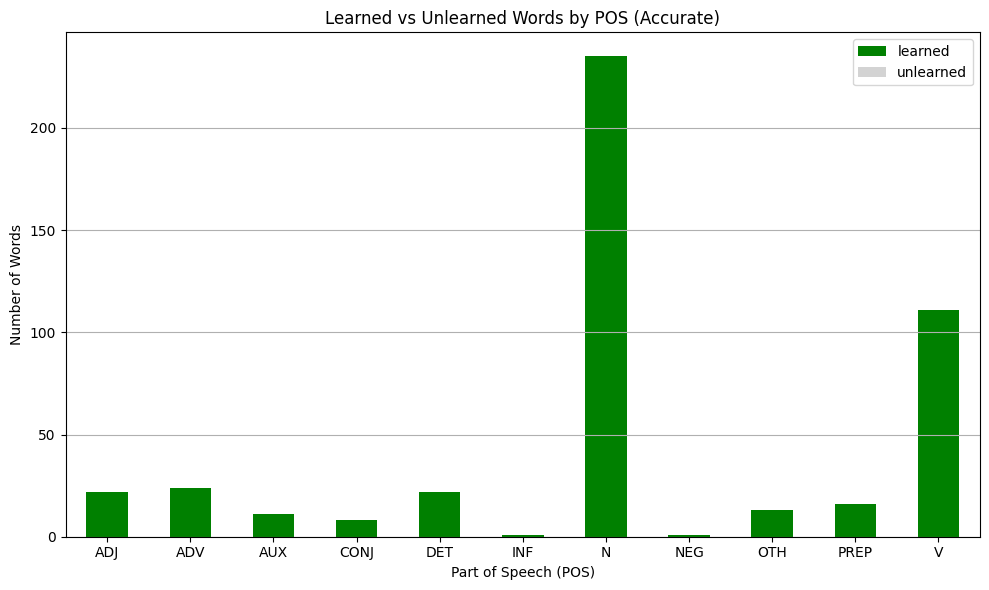

In [74]:
with open("lex_lm_-1.0_a20.0_ep0.01", "r") as f:
    lines = f.readlines()

entries = []
for i in range(0, len(lines), 2):
    word_line = lines[i].strip()
    score_line = lines[i+1].strip() if i+1 < len(lines) else ""

    match = re.match(r"(.+):(\w+):(\d+)\s+\[(.*)\]", word_line)
    score_match = re.search(r"<<\s*([0-9.eE+-]+)\s*>>", score_line)

    if match:
        word, pos, freq, senses = match.groups()
        score = float(score_match.group(1)) if score_match else None
        learned = bool(senses.strip())
        entries.append({
            "word": word,
            "pos": pos,
            "freq": int(freq),
            "learned": learned,
            "score": score,
            "num_senses": len(senses.split(",")) if learned else 0
        })

df_lex_new = pd.DataFrame(entries)

pos_summary = df_lex_new.groupby("pos")["learned"].agg(["sum", "count"]).reset_index()
pos_summary["unlearned"] = pos_summary["count"] - pos_summary["sum"]
pos_summary.columns = ["POS", "learned", "total", "unlearned"]

pos_summary.set_index("POS", inplace=True)

pos_summary[["learned", "unlearned"]].astype(int).plot(
    kind="bar", stacked=True, color=["green", "lightgray"], figsize=(10, 6)
)
plt.title("Learned vs Unlearned Words by POS (Accurate)")
plt.xlabel("Part of Speech (POS)")
plt.ylabel("Number of Words")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.tight_layout()
plt.show()



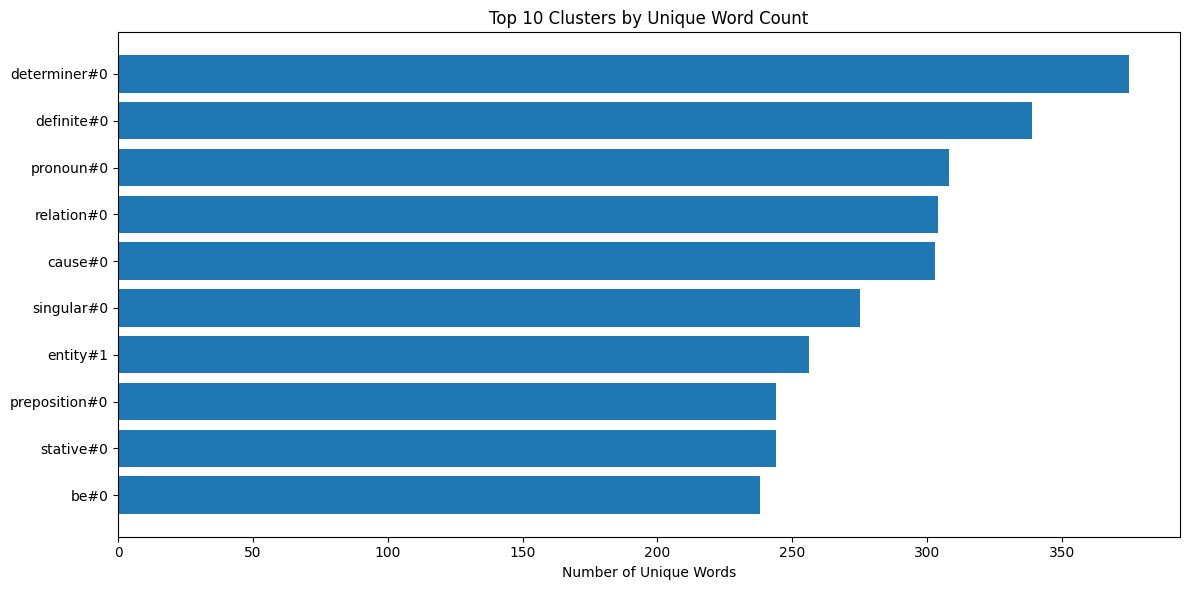

In [76]:
from collections import defaultdict
import matplotlib.pyplot as plt

align_file_path = "aligns_lm_-1.0_a20.0_ep0.01"
with open(align_file_path, "r") as file:
    align_lines = file.readlines()

feature_to_words = defaultdict(set)

for line in align_lines:
    line = line.strip()
    if not line or "--" not in line:
        continue
    word, feature_block = line.split("--")
    feature = feature_block.split()[0]
    feature_to_words[feature].add(word)

feature_counts = {feature: len(words) for feature, words in feature_to_words.items()}

top_features = sorted(feature_counts.items(), key=lambda x: x[1], reverse=True)[:10]
features, counts = zip(*top_features)

plt.figure(figsize=(12, 6))
plt.barh(features[::-1], counts[::-1])
plt.xlabel("Number of Unique Words")
plt.title("Top 10 Clusters by Unique Word Count")
plt.tight_layout()
plt.show()


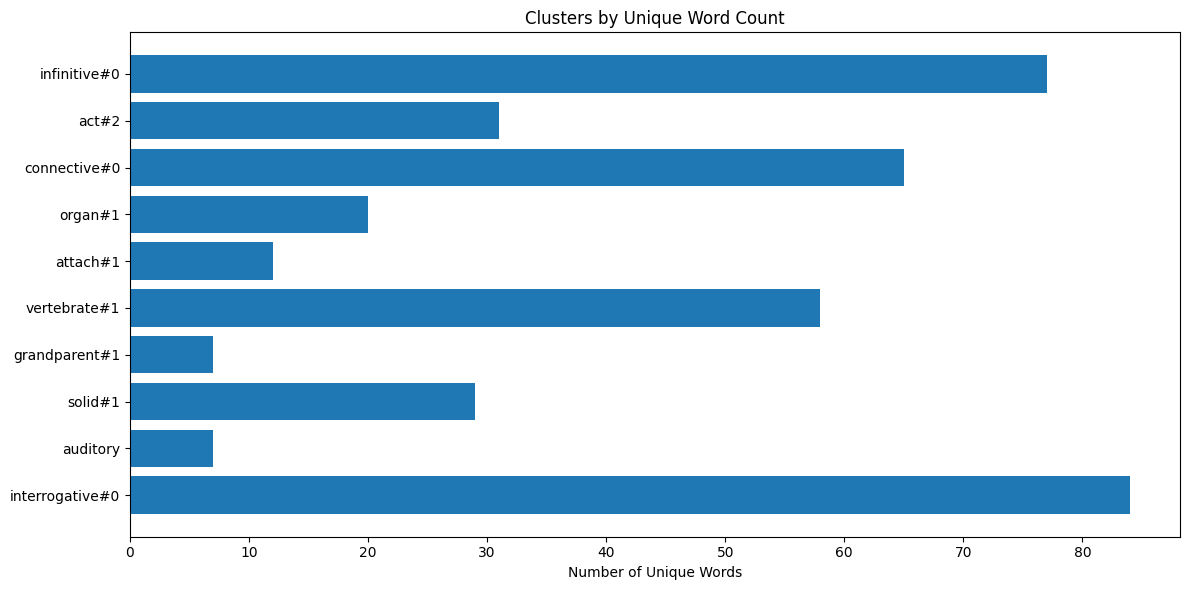

In [86]:
from collections import defaultdict
import matplotlib.pyplot as plt
import random

align_file_path = "aligns_lm_-1.0_a20.0_ep0.01"
with open(align_file_path, "r") as file:
    align_lines = file.readlines()

feature_to_words = defaultdict(set)

for line in align_lines:
    line = line.strip()
    if not line or "--" not in line:
        continue
    word, feature_block = line.split("--")
    feature = feature_block.split()[0]
    feature_to_words[feature].add(word)

feature_counts = {feature: len(words) for feature, words in feature_to_words.items()}

random_features = random.sample(list(feature_counts.items()), 10)
random_labels, random_counts = zip(*random_features)

plt.figure(figsize=(12, 6))
plt.barh(random_labels[::-1], random_counts[::-1])
plt.xlabel("Number of Unique Words")
plt.title("Clusters by Unique Word Count")
plt.tight_layout()
plt.show()
